# Plotting light curves

LSST light curves can be tricky to plot, so we've provided an easy method for a single light curve.

If you'd like to do anything more complicated, like multiple light curves on a single grid, you should consider your own plotting methods.

By default, our methods use the [Rubin-recommended palattes](https://rtn-045.lsst.io/#colorblind-friendly-plots), which try to make the plots colorblind-friendly.

## Fetch some catalog data

We will use mock DP1 data. This data has been fuzzed to show the general structure of a HATS DP1 catalog, without exposing protected Rubin data.

Note that we have two different light curves on the `diaObject` table: `diaSource` and `diaObjectForcedSource`. You should consider which is more appropriate for your science use case.

In [1]:
import lsdb
from lsdb_rubin.plot_light_curve import plot_light_curve

In [2]:
dia_object = lsdb.open_catalog("../../tests/data/mock_dp1_1000")
dia_object = dia_object.compute()
dia_object

diaObjectId         ra        dec  nDiaSources  \
_healpix_29                                                                  
164880635168346054  4649294066630237364  32.454472  35.990116           24   
264907950746260169  4624929140954397868  10.687421  68.569475           23   
...                                 ...        ...        ...          ...   
94774172274968126   4708012449787632016  83.811566  37.454313           34   
224997033656860663  4686512276392498171   55.00799  58.922692           36   

                     radecMjdTai  tract  \
_healpix_29                               
164880635168346054  60644.727423    531   
264907950746260169  60651.313693   9273   
...                          ...    ...   
94774172274968126   60646.880267    462   
224997033656860663  60640.398305   7920   

                                                            diaSource  \
_healpix_29                                                             
164880635168346054  [{visit: 2024115005682, detector: 1, band: 'y'...   
264907950746260169  [{visit: 2024120100556, detector: 0, band: 'z'...   
...                                                               ...   
94774172274968126   [{visit: 2024119197931, detector: 4, band: 'i'...   
224997033656860663  [{visit: 2024119348338, detector: 5, band: 'r'...   

                                                diaObjectForcedSource  
_healpix_29                                                            
164880635168346054  [{parentObjectId: 0, coord_ra: 23.982853, coor...  
264907950746260169  [{parentObjectId: 0, coord_ra: 31.223755, coor...  
...                                                               ...  
94774172274968126   [{parentObjectId: 0, coord_ra: 33.045524, coor...  
224997033656860663  [{parentObjectId: 0, coord_ra: 37.018527, coor...  

[1000 rows x 8 columns]

## Basic usage

You MUST provide a single light curve as the first argument. This is the entire contents of the lightcurve nested data frame.

This is the only required argument, however, and we will use the `psfMag` column by default. 

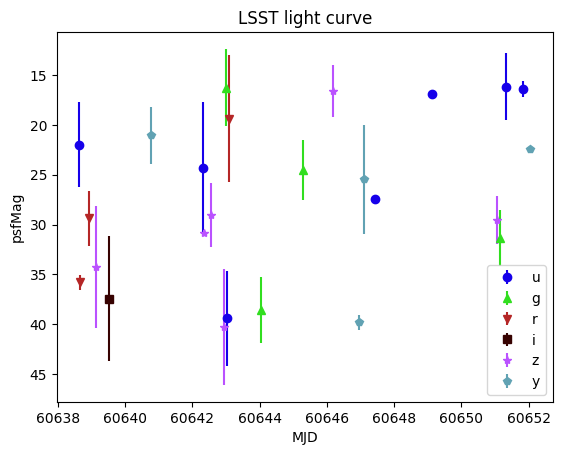

In [3]:
plot_light_curve(dia_object.iloc[0]["diaObjectForcedSource"])

## Using a different brightness

You can use either a magnitude or flux column. Straight from the Rubin Butler, you will only have flux, but the HATS pipeline adds magnitudes (and magnitude errors) from flux (and flux error) columns.

If you set a flux column, the y-axis will be un-inverted.

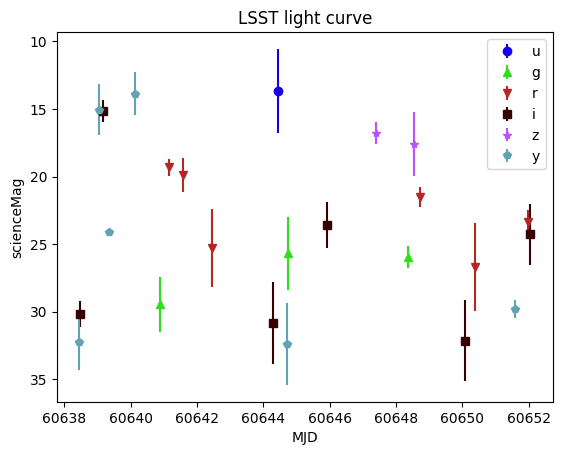

In [4]:
plot_light_curve(dia_object.iloc[0]["diaSource"], mag_field="scienceMag")

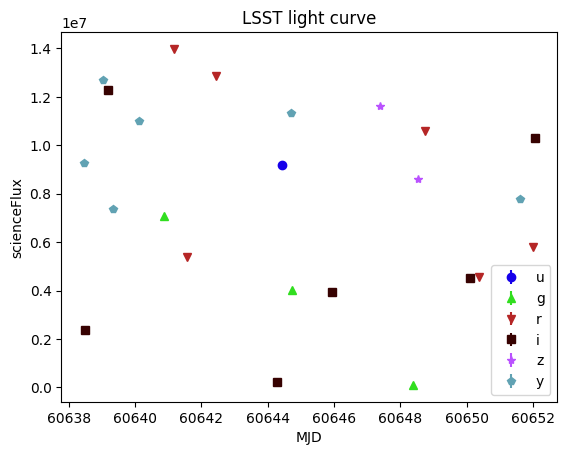

In [5]:
plot_light_curve(dia_object.iloc[0]["diaSource"], flux_field="scienceFlux")

## Phase-folded light curves

Our example light curves are not pretty, but we can show them phase-folded by simply providing a `period` argument, in days. This will fold the light curve according to the provided period, and the x-axis reflects the phase in the period.

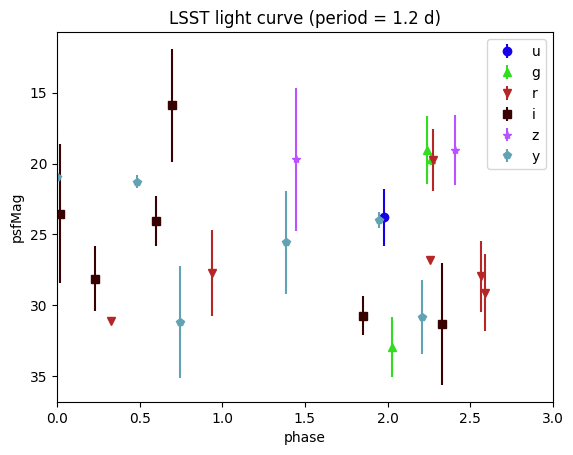

In [ ]:
plot_light_curve(dia_object.iloc[0]["diaSource"], period=1.2)

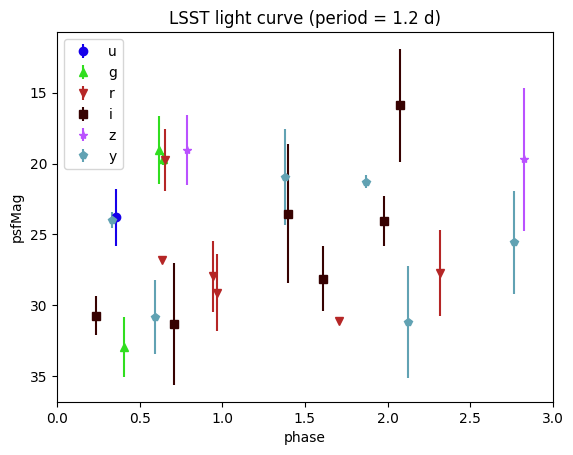

In [13]:
plot_light_curve(dia_object.iloc[0]["diaSource"], period=1.2, num_periods=3, period_mjd0=60640.4)

## Incomplete band data

If you are missing data in one or more bands, those will not appear in the legend. The following light curve doesn't have any `r`-band observations.

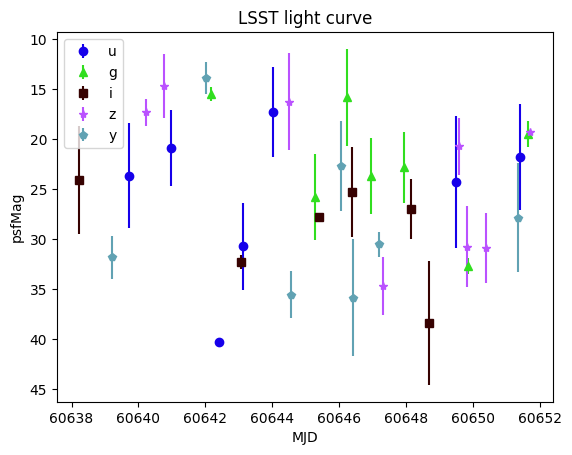

In [7]:
missing_r = dia_object.query("diaObjectId == 4670308463850921897")
plot_light_curve(missing_r.iloc[0]["diaObjectForcedSource"])

## Customizing appearance

While we use the default Rubin color-blind friendly palatte, that might not work for you for whatever reason. For visual aspects of the plot that will vary by band, you can pass in a dictionary that maps the band string to the desired value.

- `filter_colors`
- `filter_symbols`
- `filter_linestyles`

The first example uses a built-in color palatte, while the second example defines a new map.

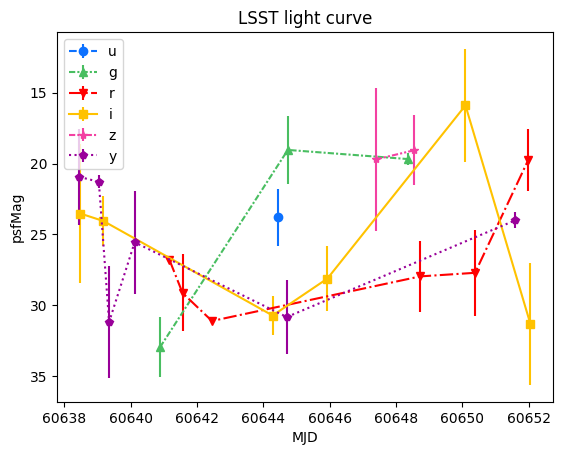

In [10]:
from lsdb_rubin.plot_light_curve import plot_filter_colors_rainbow, plot_linestyles, plot_linestyles_none

plot_light_curve(
    dia_object.iloc[0]["diaSource"],
    filter_colors=plot_filter_colors_rainbow,
    filter_linestyles=plot_linestyles,
)

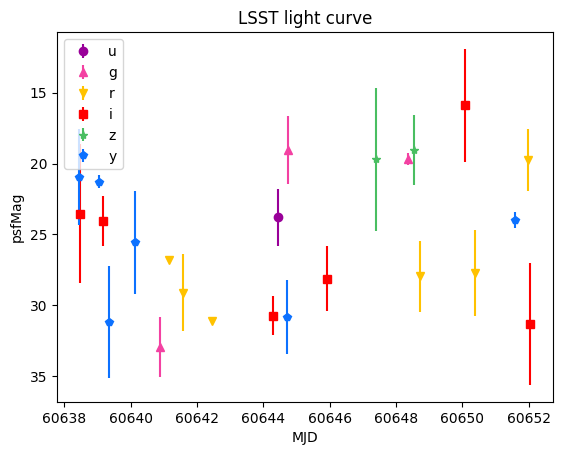

In [9]:
color_map = {
    "y": "#0c71ff",  # Blue
    "z": "#49be61",  # Green
    "i": "#ff0000",  # Red
    "r": "#ffc200",  # Orange/Yellow
    "g": "#f341a2",  # Pink/Magenta
    "u": "#990099",  # Purple
}
plot_light_curve(dia_object.iloc[0]["diaSource"], filter_colors=color_map)

You can also override a single value of the existing by-filter maps. In this case, we're adding a line only in the `r` band.

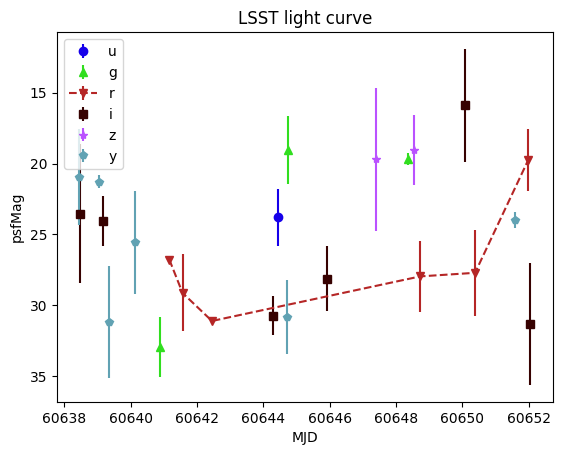

In [16]:
plot_light_curve(dia_object.iloc[0]["diaSource"], filter_linestyles=plot_linestyles_none | {"r": "--"})

## About

**Authors**: Melissa DeLucchi

Last updated on: Aug 12, 2025

If you use `lsdb` for published research, please cite following the [instructions here](https://docs.lsdb.io/en/stable/citation.html).